Name : Vamsi Dath M

College : NIT Durgapur

# Project - German traffic sign recognition benchmark

In [1]:
!pip install numpy

In [2]:
!pip install matplotlib

In [3]:
!pip install pandas

In [4]:
!pip install pathlib

In [5]:
!pip install keras

In [6]:
!pip install tensorflow

In [17]:
!pip install sklearn

In [1]:
import numpy as np    
import matplotlib.pyplot as plt    
import pandas as pd    
from pathlib import Path   
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import keras
np.random.seed(42)

Data preparation

In [2]:
#to get name of each class creating dictionary
lab_to_name = {
                0:'Speed limit (20km/h)',
                1:'Speed limit (30km/h)', 
                2:'Speed limit (50km/h)', 
                3:'Speed limit (60km/h)', 
                4:'Speed limit (70km/h)', 
                5:'Speed limit (80km/h)', 
                6:'End of speed limit (80km/h)', 
                7:'Speed limit (100km/h)', 
                8:'Speed limit (120km/h)', 
                9:'No passing', 
                10:'No passing veh over 3.5 tons', 
                11:'Right-of-way at intersection', 
                12:'Priority road', 
                13:'Yield',
                14:'Stop', 
                15:'No vehicles', 
                16:'Veh > 3.5 tons prohibited', 
                17:'No entry', 
                18:'General caution', 
                19:'Dangerous curve left', 
                20:'Dangerous curve right', 
                21:'Double curve', 
                22:'Bumpy road', 
                23:'Slippery road', 
                24:'Road narrows on the right', 
                25:'Road work', 
                26:'Traffic signals', 
                27:'Pedestrians', 
                28:'Children crossing', 
                29:'Bicycles crossing', 
                30:'Beware of ice/snow',
                31:'Wild animals crossing', 
                32:'End speed + passing limits', 
                33:'Turn right ahead', 
                34:'Turn left ahead', 
                35:'Ahead only', 
                36:'Go straight or right', 
                37:'Go straight or left', 
                38:'Keep right', 
                39:'Keep left', 
                40:'Roundabout mandatory', 
                41:'End of no passing', 
                42:'End no passing veh > 3.5 tons'
              }

In [3]:
######how to get lable from the directory
###Converting those strings as the labels
### Train\0  -->>    str(d).split("\\")[-1] ---> this gives the last word(number)  thats the label

In [4]:
p = Path('./Train');
dirs = p.glob("*");
dirs

<generator object Path.glob at 0x000001F5972D84A0>

In [5]:
lable = []   ##lable array
img_data = [] ##input training images as array format
count = {}   ##using the dict to count no.of images of each type


for folder in dirs:
    lables = str(folder).split("\\")[-1];
    
    #getting every image path from that folder
    cnt = 0;
    for img_path in folder.glob("*"):
        
        ##using keras reading the imager
        img = image.load_img(img_path,target_size=(40,40));
        
        ##converting img to array
        image_data = image.img_to_array(img);
        
        ##append into image_data array
        img_data.append(image_data);
        cnt+=1;   ##counting no.of images in each sub folder
        
        ##append the ouput label in lables array
        lable.append(lables);
        #lable1 = lable2name[lable]
    count[lab_to_name[int(lables)]] = cnt;
    
print(count);

{'Speed limit (20km/h)': 210, 'Speed limit (30km/h)': 2220, 'No passing veh over 3.5 tons': 2010, 'Right-of-way at intersection': 1320, 'Priority road': 2100, 'Yield': 2160, 'Stop': 780, 'No vehicles': 630, 'Veh > 3.5 tons prohibited': 420, 'No entry': 1110, 'General caution': 1200, 'Dangerous curve left': 210, 'Speed limit (50km/h)': 2250, 'Dangerous curve right': 360, 'Double curve': 330, 'Bumpy road': 390, 'Slippery road': 510, 'Road narrows on the right': 270, 'Road work': 1500, 'Traffic signals': 600, 'Pedestrians': 240, 'Children crossing': 540, 'Bicycles crossing': 270, 'Speed limit (60km/h)': 1410, 'Beware of ice/snow': 450, 'Wild animals crossing': 780, 'End speed + passing limits': 240, 'Turn right ahead': 689, 'Turn left ahead': 420, 'Ahead only': 1200, 'Go straight or right': 390, 'Go straight or left': 210, 'Keep right': 2070, 'Keep left': 300, 'Speed limit (70km/h)': 1980, 'Roundabout mandatory': 360, 'End of no passing': 240, 'End no passing veh > 3.5 tons': 240, 'Speed 

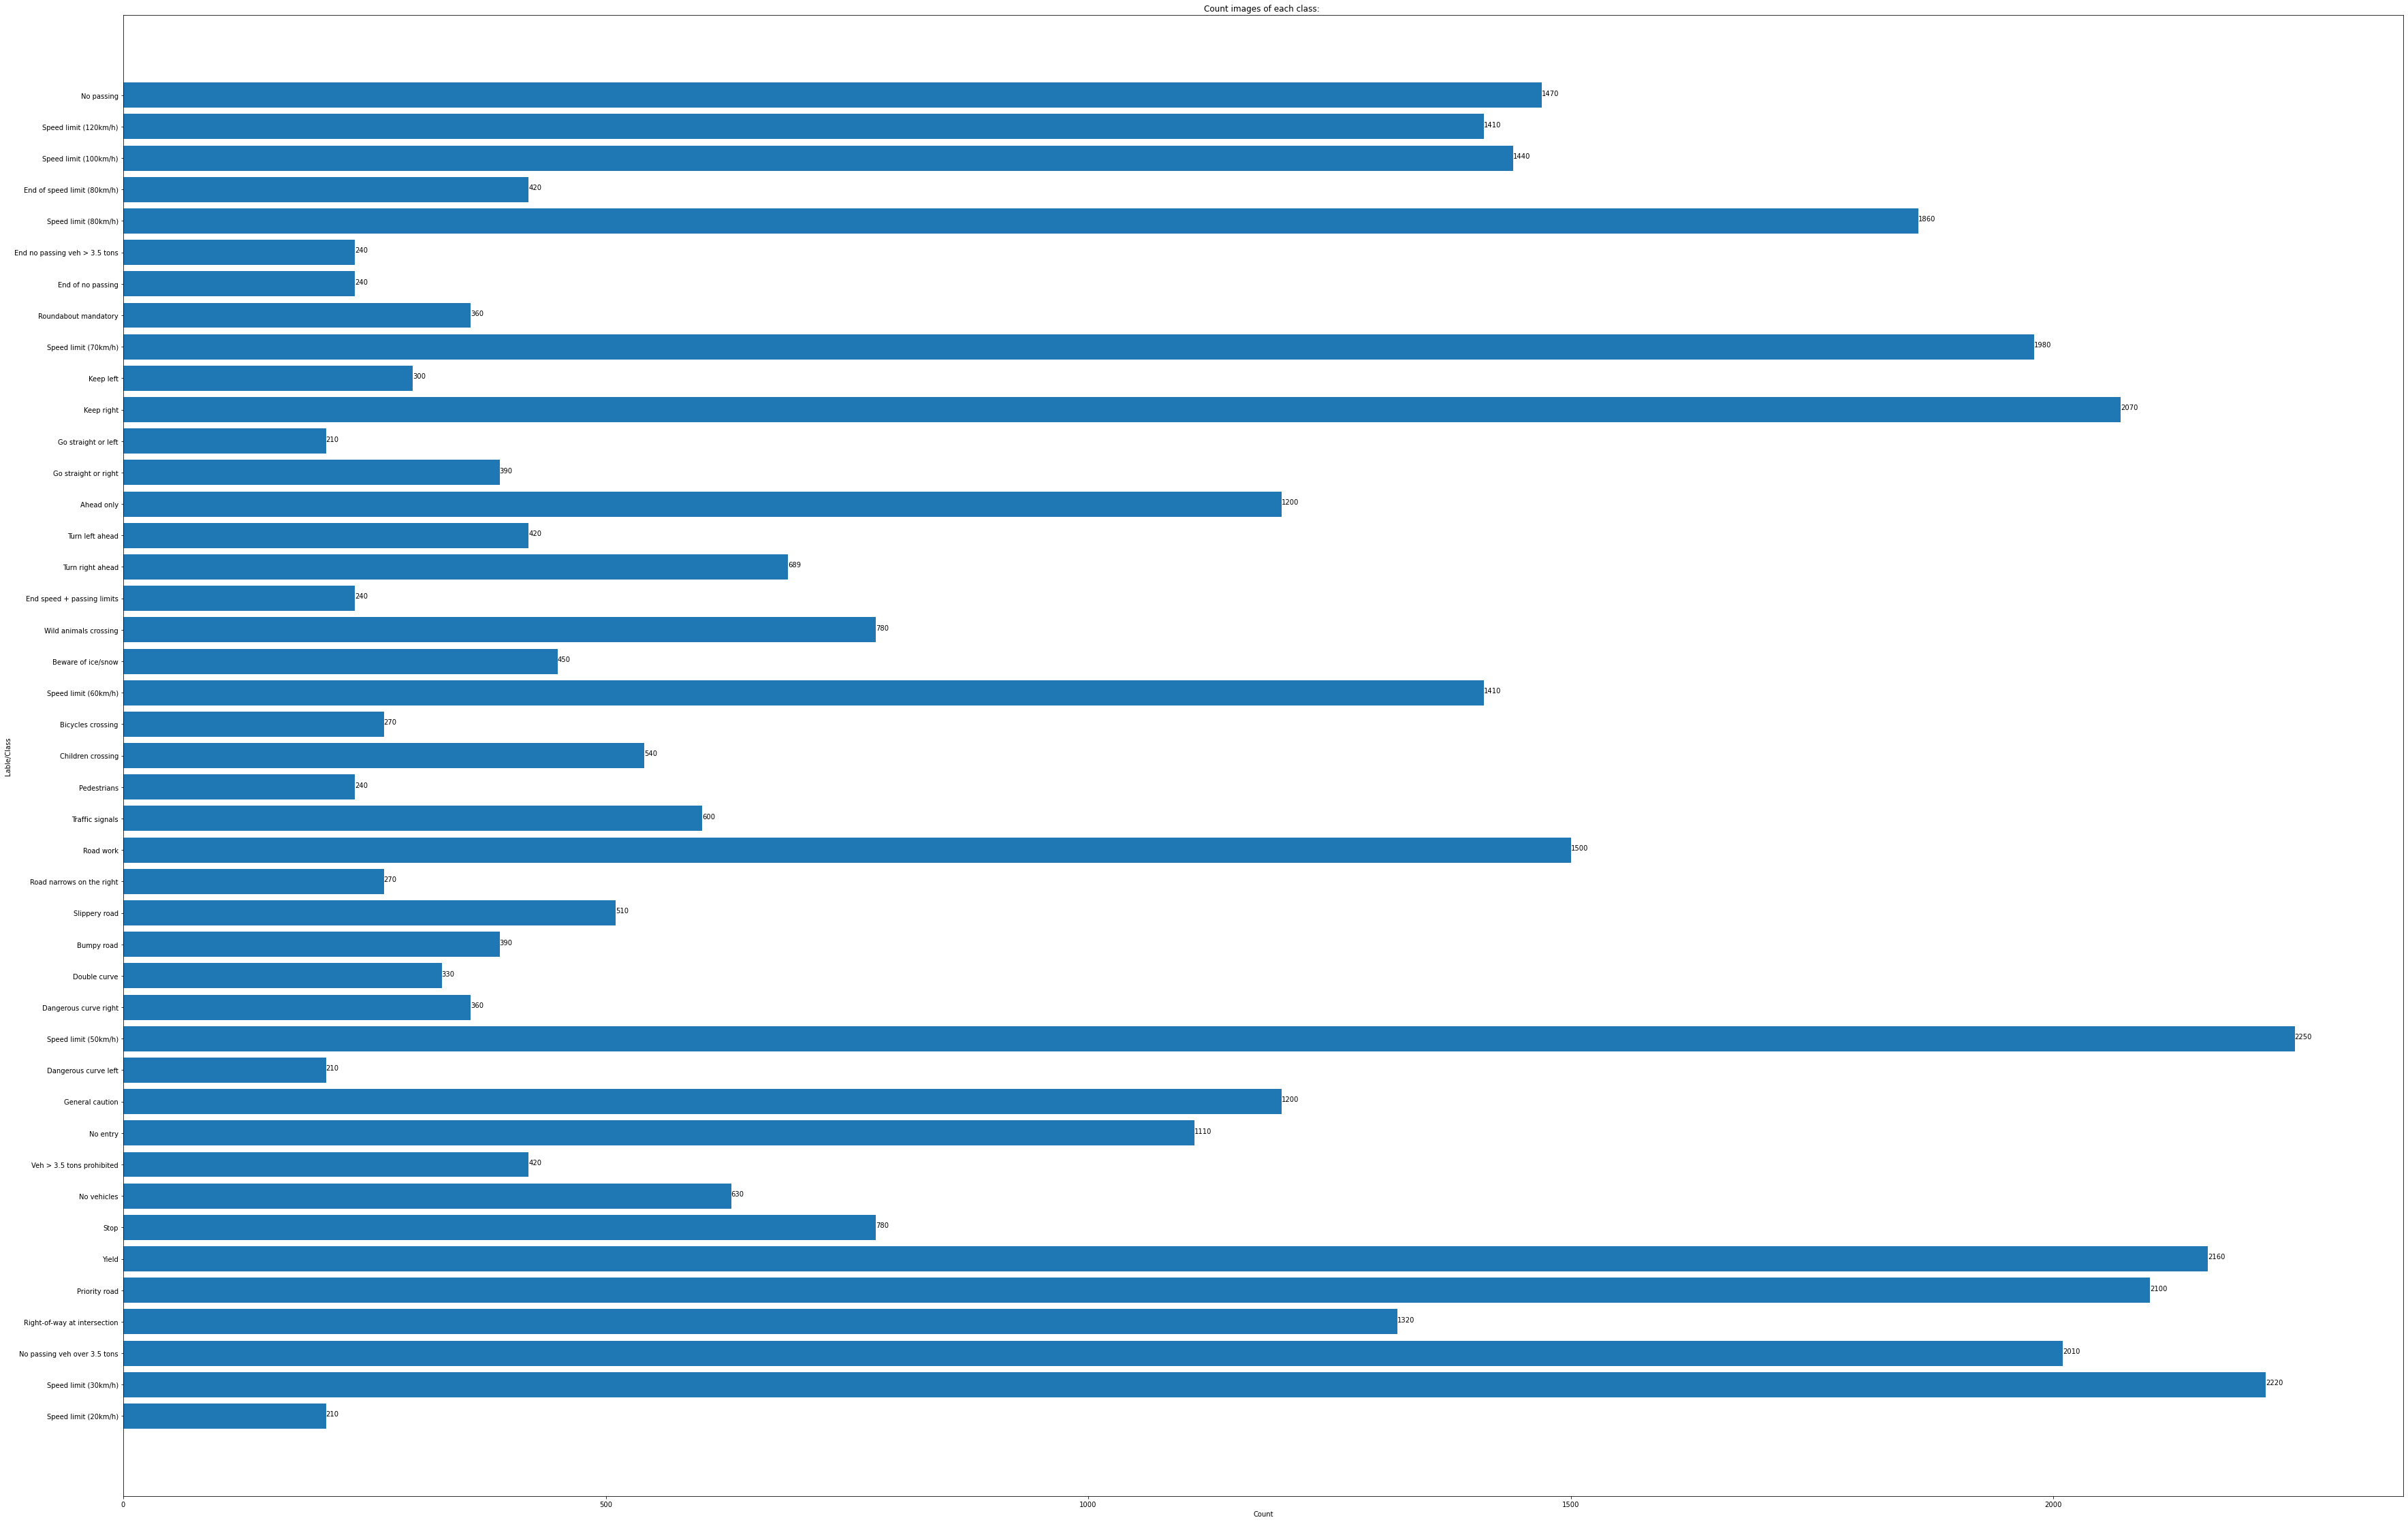

In [6]:
#####Plotting the bar graph of counts of images
plt.figure(figsize = (60, 40))
plt.barh(list(count.keys()),list(count.values()));
plt.title("Count images of each class: ");
plt.xlabel("Count");
plt.ylabel("Lable/Class");
for index, value in enumerate(list(count.values())):
    plt.text(value, index, str(value))

In [7]:
x = np.array(img_data);
y = np.array(lable);

In [8]:
x.shape

(39209, 40, 40, 3)

In [9]:
y.shape

(39209,)

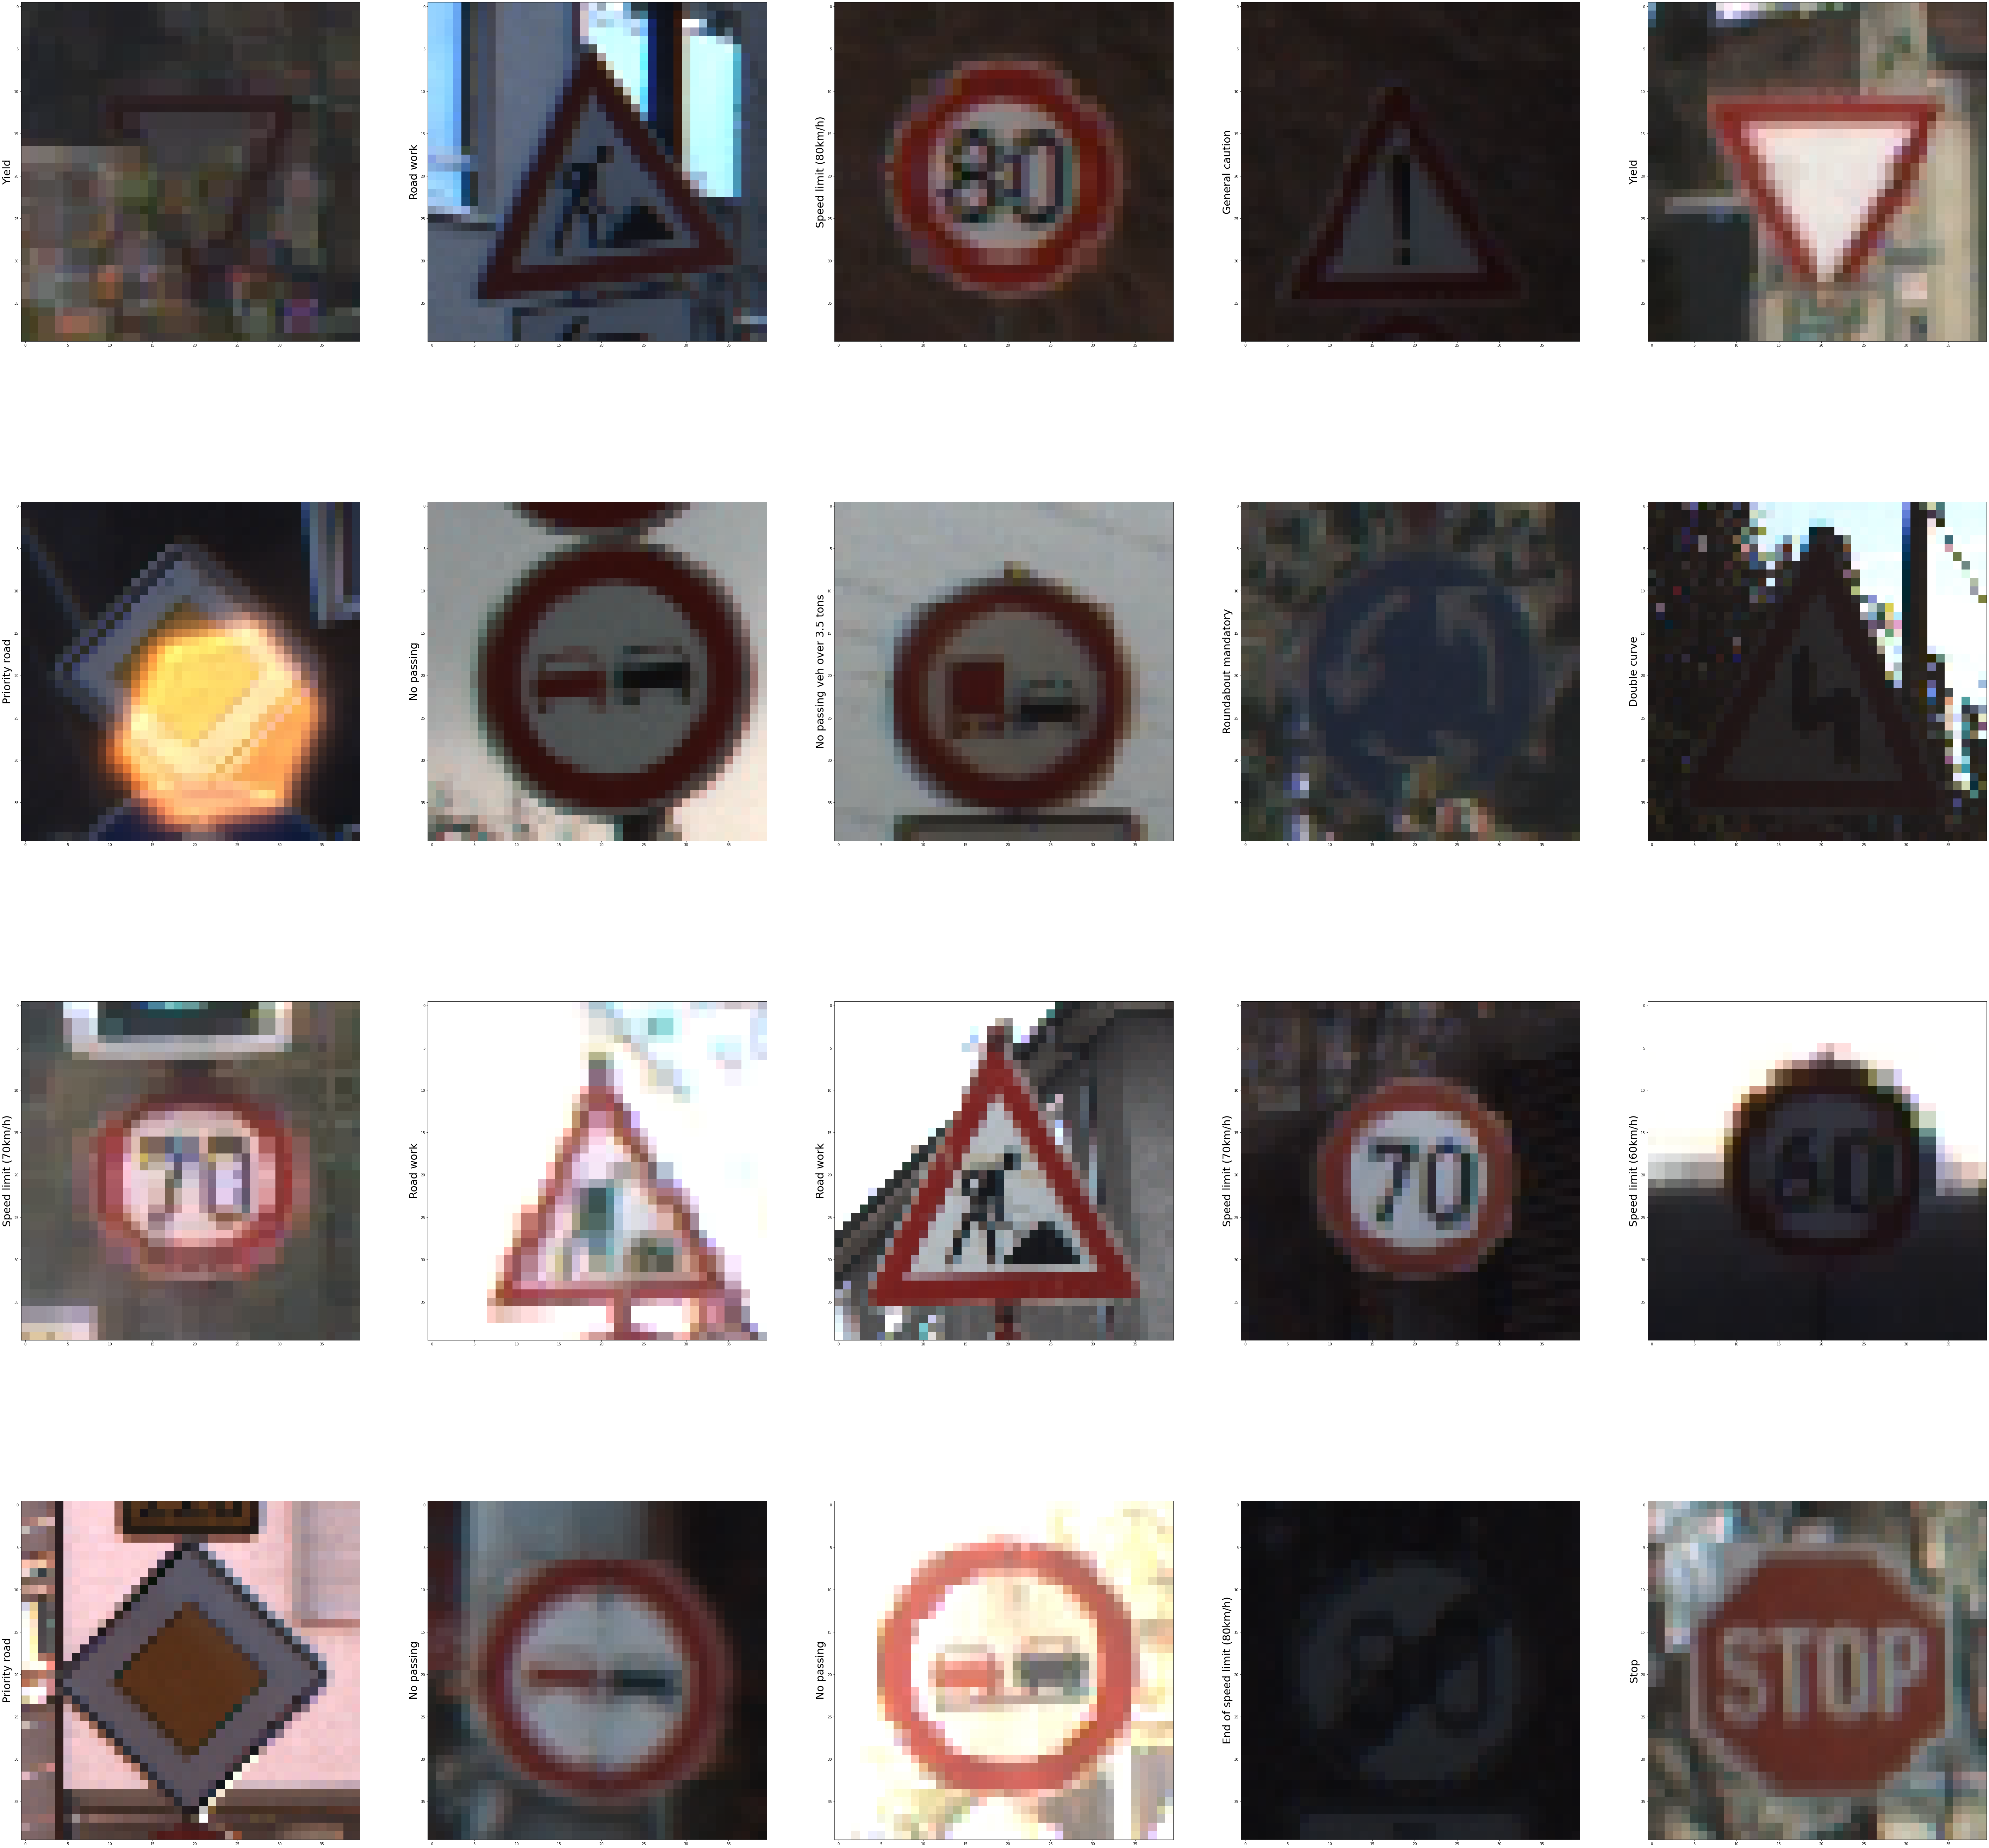

In [10]:
from sklearn.utils import shuffle
x,y = shuffle(x,y,random_state=2);
plt.figure(figsize = (100, 100))
for i in range(20):
    plt.subplot(4,5,i+1);
    plt.imshow(x[i]/255);
    plt.ylabel(lab_to_name[int(y[i])],fontsize = 30);
plt.show();

In [11]:
#Normalizing the X by keeping values bwteen 0 & 1
x = x/255.0;
x.shape

(39209, 40, 40, 3)

In [12]:
from keras.utils import to_categorical
y= to_categorical(y);   #changing dimension
print(y.shape);

(39209, 43)


In [13]:
shuffle_indexes = np.arange(x.shape[0])
np.random.shuffle(shuffle_indexes)
x = x[shuffle_indexes]
y = y[shuffle_indexes]
print(x.shape);
print(y.shape);

(39209, 40, 40, 3)
(39209, 43)


In [14]:
#Splitting the dataset into test and train set

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=25, shuffle=True)



print("X_train.shape", x_train.shape)
print("X_valid.shape", x_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 40, 40, 3)
X_valid.shape (11763, 40, 40, 3)
y_train.shape (27446, 43)
y_valid.shape (11763, 43)


In [15]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(40,40,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),

    keras.layers.Dense(43, activation='softmax')
])

In [17]:
lr = 0.001    #learning rate
epochs = 10   #no.of epochs

opt = Adam(lr=lr, decay=lr / (epochs*0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

C:\Users\hp\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest"
)

In [19]:
hist = model.fit(aug.flow(x_train, y_train, batch_size=128), epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
215/215 [==============================] - 129s 590ms/step - loss: 1.1533 - accuracy: 0.6848 - val_loss: 4.0755 - val_accuracy: 0.1014
Epoch 2/10
215/215 [==============================] - 81s 375ms/step - loss: 0.1895 - accuracy: 0.9464 - val_loss: 2.5632 - val_accuracy: 0.3038
Epoch 3/10
215/215 [==============================] - 75s 348ms/step - loss: 0.0936 - accuracy: 0.9739 - val_loss: 0.0655 - val_accuracy: 0.9881
Epoch 4/10
215/215 [==============================] - 96s 445ms/step - loss: 0.0669 - accuracy: 0.9811 - val_loss: 0.0195 - val_accuracy: 0.9946
Epoch 5/10
215/215 [==============================] - 94s 439ms/step - loss: 0.0469 - accuracy: 0.9873 - val_loss: 0.0148 - val_accuracy: 0.9964
Epoch 6/10
215/215 [==============================] - 75s 349ms/step - loss: 0.0415 - accuracy: 0.9881 - val_loss: 0.0237 - val_accuracy: 0.9927
Epoch 7/10
215/215 [==============================] - 77s 358ms/step - loss: 0.0315 - accuracy: 0.9908 - val_loss: 0.0178 - val_a

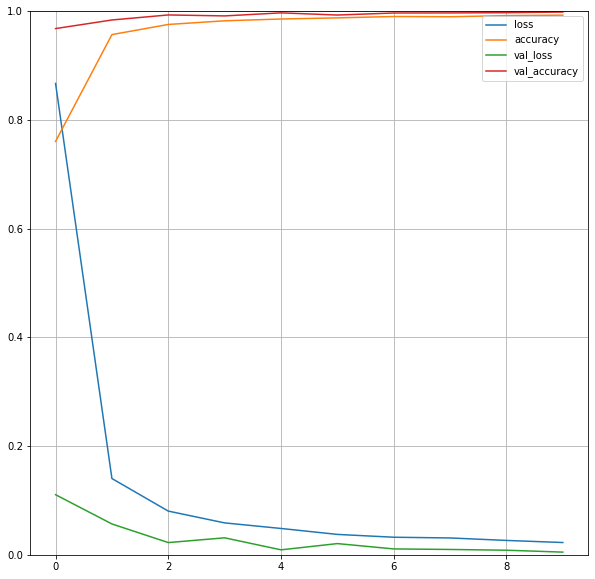

In [33]:
#Evaluating model ->
pd.DataFrame(hist.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Predictions on dataset

In [34]:
#reading labels from dataset csv file
test = pd.read_csv("Test.csv");
print(test.head(5));

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png


In [35]:
test_labels = test["ClassId"].values
test_labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [41]:
pt  =  Path("./Test");    #path checking for train folder
image_test_data = [];

for imgtest in pt.glob("*.png"):
    
    img = image.load_img(imgtest,target_size=(40,40));

    img_data = image.img_to_array(img);

    image_test_data.append(img_data);
    

In [42]:
x_test = np.array(image_test_data);
y_actual = np.array(test_labels);
x_test = x_test/255;
print(x_test.shape);
print(y_actual.shape);

(12630, 40, 40, 3)
(12630,)


In [43]:
#predicting the data with model

y_pred = np.argmax(model.predict(x_test), axis=1);

395/395 [==============================] - 7s 17ms/step


In [45]:
#Accuracy
from sklearn.metrics import accuracy_score
print('Test Data Accuracy: ',accuracy_score(y_actual, y_pred)*100)

Test Data Accuracy:  98.20269200316706


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.98      1.00      0.99       720
           2       0.99      0.99      0.99       750
           3       0.96      0.97      0.97       450
           4       1.00      0.99      0.99       660
           5       0.95      1.00      0.97       630
           6       0.98      0.95      0.97       150
           7       1.00      1.00      1.00       450
           8       0.99      0.96      0.97       450
           9       0.99      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      0.95      0.97       420
          12       0.99      0.97      0.98       690
          13       0.99      1.00      1.00       720
          14       0.99      1.00      1.00       270
          15       0.95      1.00      0.97       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [49]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_actual, y_pred)
print(cf_matrix);

[[ 57   0   0 ...   0   0   0]
 [  0 720   0 ...   0   0   0]
 [  0   4 746 ...   0   0   0]
 ...
 [  0   0   0 ...  85   0   0]
 [  0   0   0 ...   0  60   0]
 [  0   0   0 ...   0   0  81]]


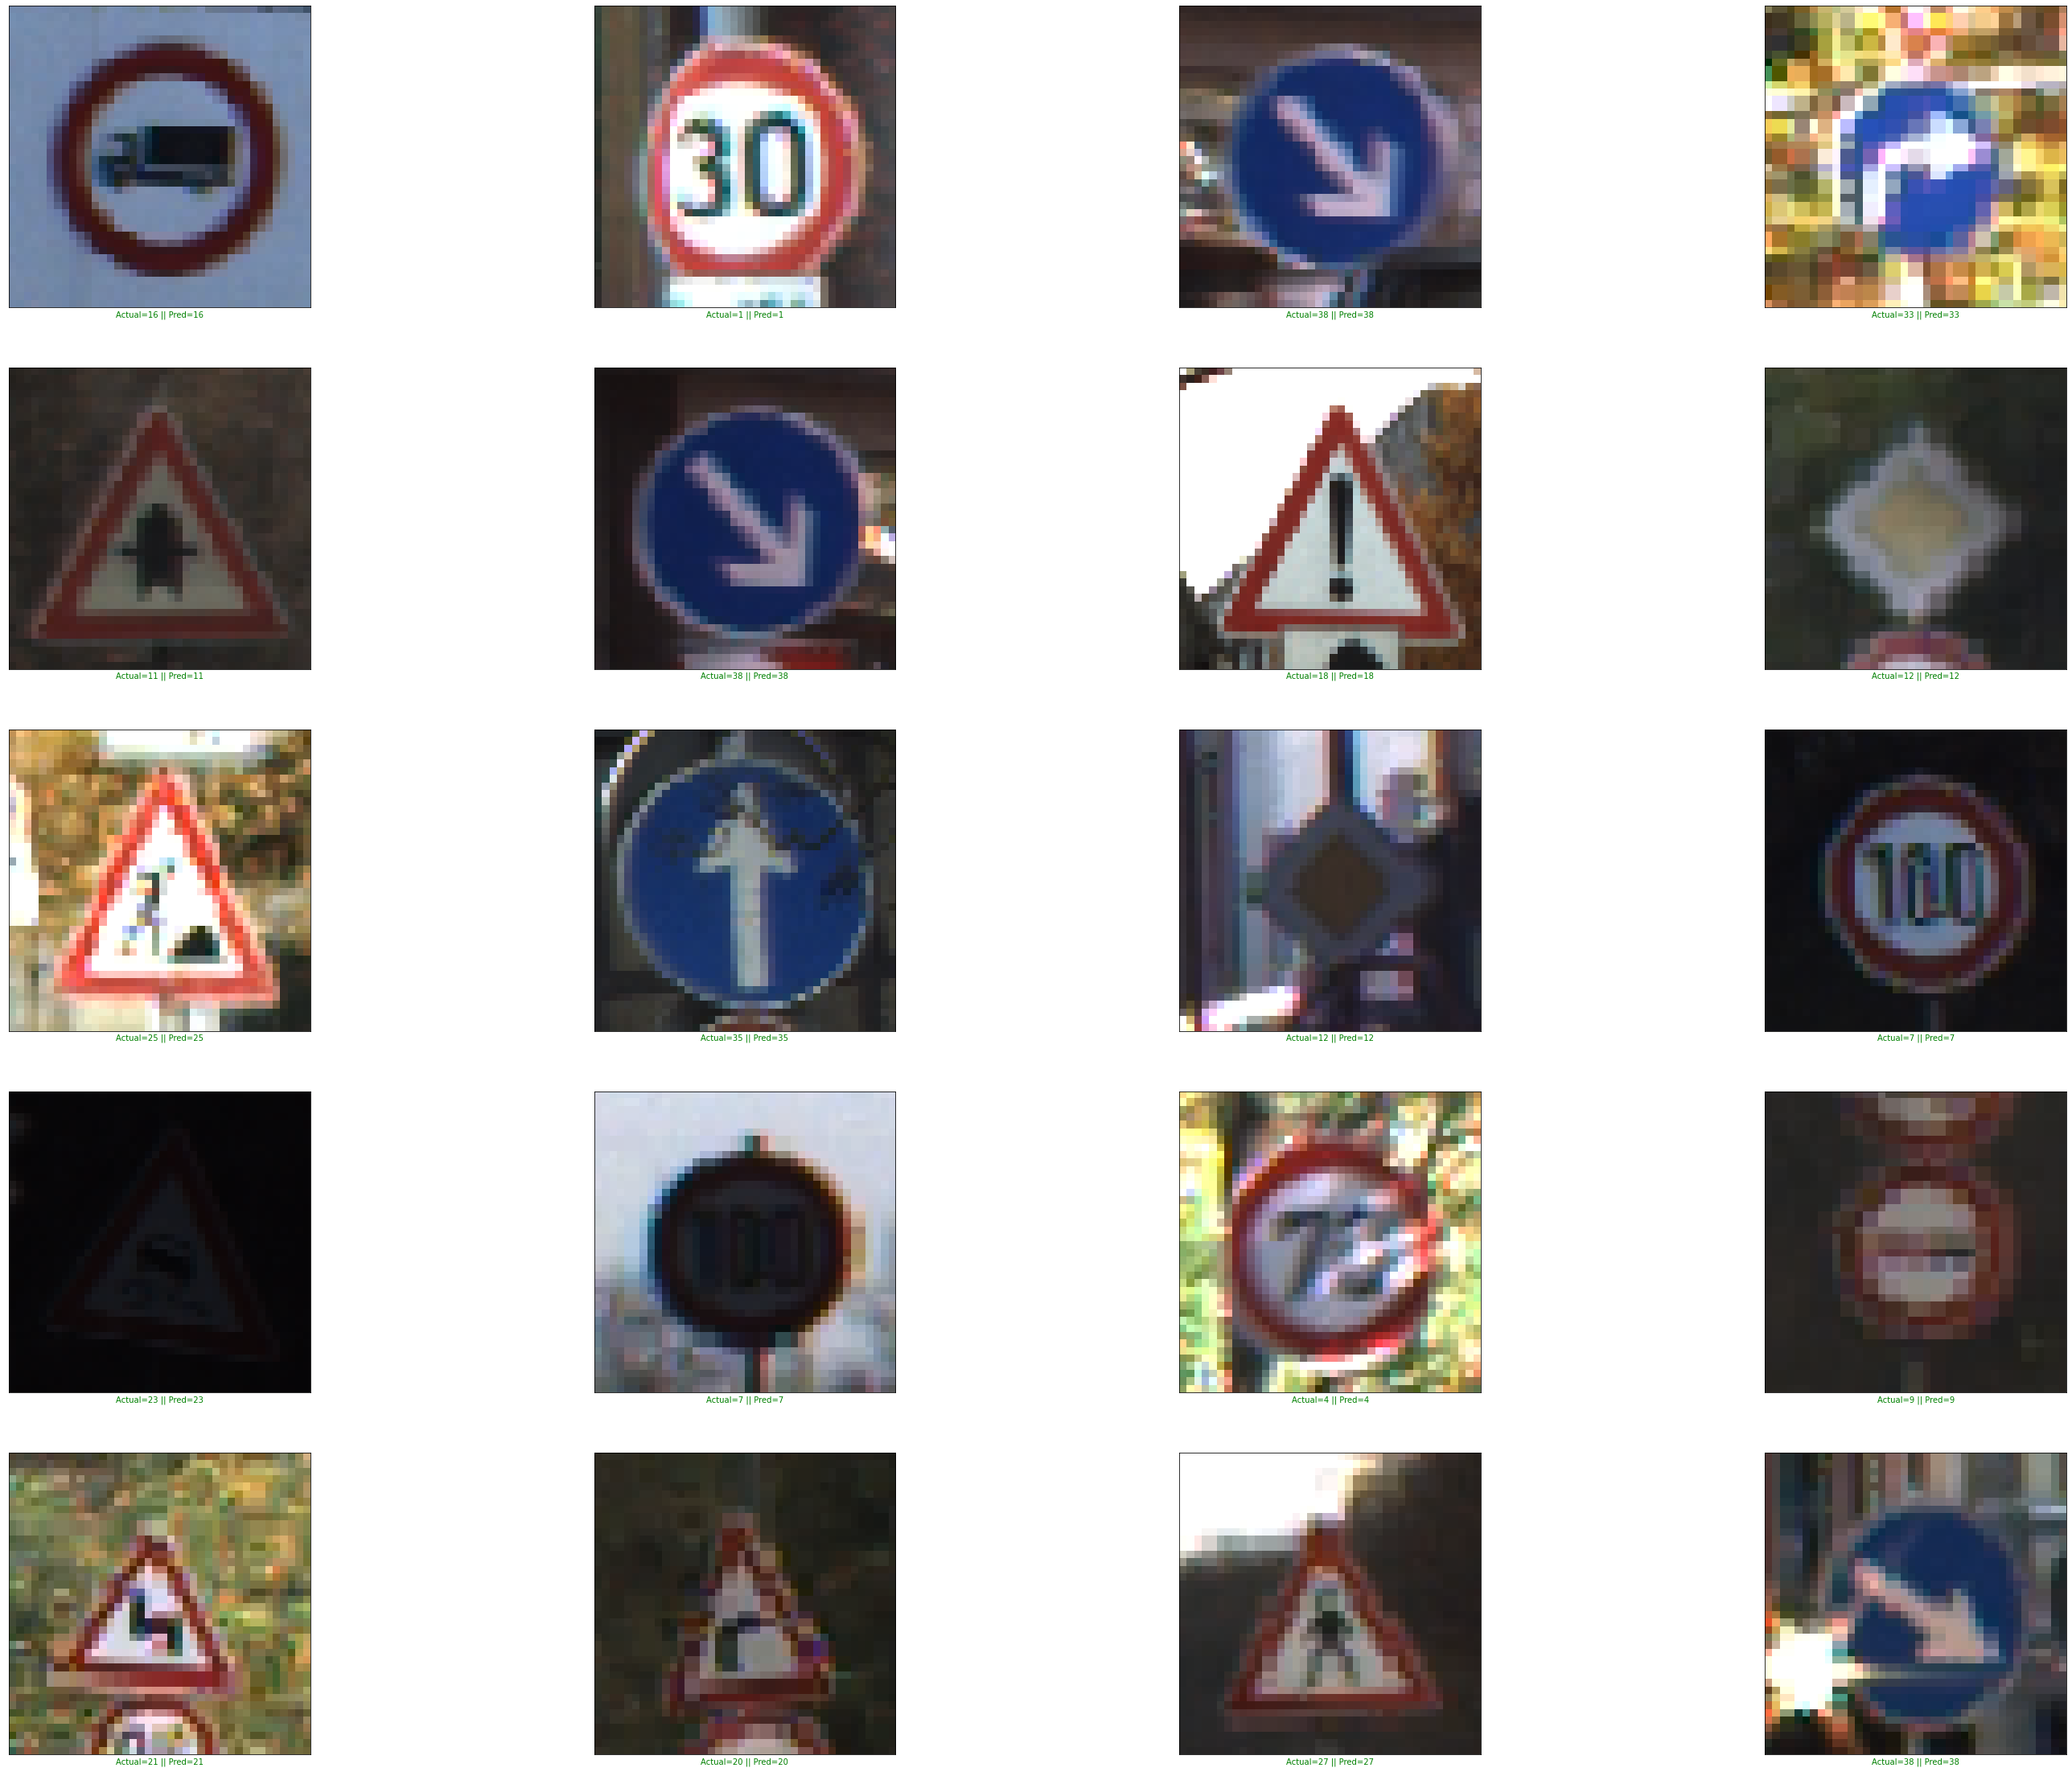

In [52]:
#predction on test images
plt.figure(figsize = (50,40))

start_index = 0;
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  prediction = y_pred[start_index + i]
  actual = y_actual[start_index + i]
  col = 'g'     #if prediction is right
  if prediction != actual:
    col = 'r'   #if prediction is wrong
  plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
  plt.imshow(x_test[start_index + i])
plt.show()